Modelo de Árboles de decisión - Jorge Guerrero Ruiz - 202016908

In [1]:
#Importar las librerias necesarias al entorno de trabajo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns

In [2]:
#Cargar el dataset 

datos = pd.read_csv ("C:/Users/Jorge/Documents/datasets/wine.data",
                    header=None, 
                    names=["Clase","Alcohol","Acido Malico", "Ceniza", "Alcalinidad de las cenizas", "Magnesio","Fenoles totales","Flavonoides","Fenoles no flavonoides","Proantocianinas","Intensidad del color","Tono","DO280/OD315 de vinos diluidos","Prolina"])

In [3]:
# Explorar el dataset

datos.head()

,Clase,Alcohol,Acido Malico,Ceniza,Alcalinidad de las cenizas,Magnesio,Fenoles totales,Flavonoides,Fenoles no flavonoides,Proantocianinas,Intensidad del color,Tono,DO280/OD315 de vinos diluidos,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#Verificar la cantidad de filas y columnas del dataset

datos.shape

(178, 14)

In [5]:
# Verificar las medidas estadisticas del dataset
datos.describe()

,Clase,Alcohol,Acido Malico,Ceniza,Alcalinidad de las cenizas,Magnesio,Fenoles totales,Flavonoides,Fenoles no flavonoides,Proantocianinas,Intensidad del color,Tono,DO280/OD315 de vinos diluidos,Prolina
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

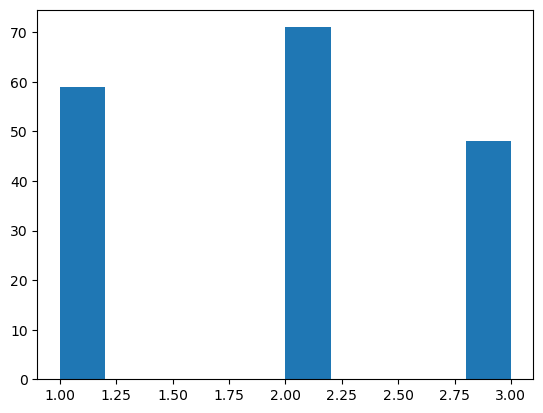

In [6]:
# Verificar la cantidad de registros para cada clase de Vino 

plt.hist(datos.Clase)

In [7]:
# Realizar la separación de las columnas del dataset

predictors_col = ["Alcohol","Acido Malico", "Ceniza", "Alcalinidad de las cenizas", "Magnesio","Fenoles totales","Flavonoides","Fenoles no flavonoides","Proantocianinas","Intensidad del color","Tono","DO280/OD315 de vinos diluidos","Prolina"]
target_col = ['Clase']

In [8]:
# Definir predictor y target 

predictors = datos[predictors_col]
target = datos[target_col]

In [9]:
# Separar el conjunto de datos en train y test (80% - 20%)

x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [10]:
# Crear el árbol de decisión

tree = tree = DecisionTreeClassifier()

In [11]:
# Entrenar el arbol de decisión con x_train y y_train

arbol = tree.fit(x_train, y_train)

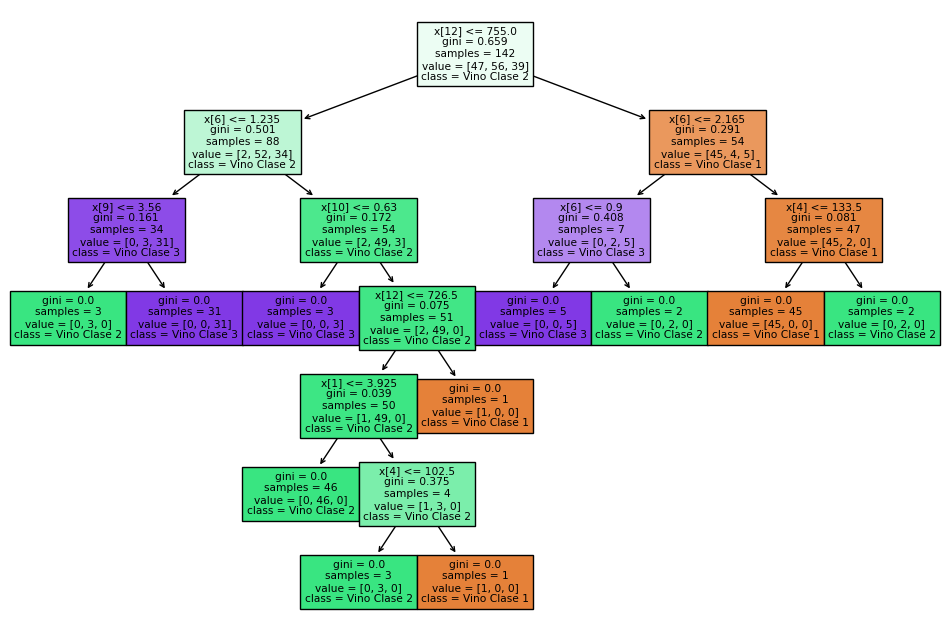

In [12]:
# Graficar el arbol de decisión
clases = ['Vino Clase 1', 'Vino Clase 2', 'Vino Clase 3']
plt.figure(figsize=(12, 8))  
plot_tree(arbol, filled=True, class_names=clases)
plt.show()

In [13]:
# Realizar las predicciones mediante el modelo entrenado

predicciones = arbol.predict(x_test)

In [14]:
#Calcular la matriz de confusión

conf_matrix = confusion_matrix(y_test, predicciones)

Text(0.5, 1.0, 'Matriz de Confusión')

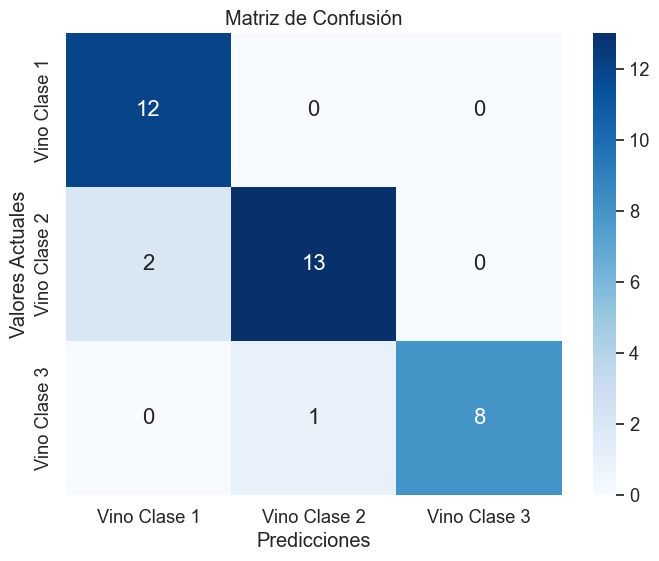

In [15]:
# Imprimir la matriz de confusión

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16},xticklabels=clases, yticklabels=clases)
plt.xlabel('Predicciones')
plt.ylabel('Valores Actuales')
plt.title('Matriz de Confusión')

In [16]:
# Calcular y mostrar las métricas de evaluación del modelo entrenado

accuracy = accuracy_score(y_test, predicciones)
precision_none = precision_score(y_test, predicciones, average=None)
precision_macro = precision_score(y_test, predicciones, average='macro')
recall_none = recall_score(y_test, predicciones, average=None)
recall_macro = recall_score(y_test, predicciones, average='macro')
f1_none = f1_score(y_test, predicciones, average=None)
f1_macro = f1_score(y_test, predicciones, average='macro')

print("Metricas de rendimiento del modelo")

print("")
print(f'Exactitud: {accuracy * 100:.2f}%')

print("")
for i, precision in enumerate(precision_none):
    class_name = clases[i]
    print(f'Precisión para {class_name}: {precision * 100:.2f}%')    
print(f"Precisión (promedio): {precision_macro * 100:.2f}%")    

print("")    
for i, recall in enumerate(recall_none):
    class_name = clases[i]
    print(f'Recall para {class_name}: {recall * 100:.2f}%')    
print(f"Recall (promedio): {recall_macro * 100:.2f}%")   


print("")    
for i, f1 in enumerate(f1_none):
    class_name = clases[i]
    print(f'F1 Score para {class_name}: {f1 * 100:.2f}%')    
print(f"F1 Score (promedio): {f1_macro * 100:.2f}%")   


Metricas de rendimiento del modelo

Exactitud: 91.67%

Precisión para Vino Clase 1: 85.71%
Precisión para Vino Clase 2: 92.86%
Precisión para Vino Clase 3: 100.00%
Precisión (promedio): 92.86%

Recall para Vino Clase 1: 100.00%
Recall para Vino Clase 2: 86.67%
Recall para Vino Clase 3: 88.89%
Recall (promedio): 91.85%

F1 Score para Vino Clase 1: 92.31%
F1 Score para Vino Clase 2: 89.66%
F1 Score para Vino Clase 3: 94.12%
F1 Score (promedio): 92.03%
